<a href="https://colab.research.google.com/github/k-ganda/maternal_risk_preprocessing/blob/main/maternal_health_risk_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Maternal Health Risk Prediction
## ALU

## Student Name: Kathrine Ganda

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **1.
   US Government open data: https://catalog.data.gov/dataset/?q=maternal+risk&sort=views_recent+desc&ext_location=&ext_bbox=&ext_prev_extent=**

   **2. CDC: https://www.cdc.gov/pcd/issues/2022/21_0266.htm**

   **3. The DHS Program: https://dhsprogram.com/pubs/pdf/PR143/PR143.pdf**

   **4. UNICEF Data: https://data.unicef.org/wp-content/uploads/cp/maternal-newborn-health/maternal-and-newborn-health_KEN.pdf **

   **5. UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/863/maternal+health+risk**
  
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   Yes, data aggregation from multiple sources is necessary.
   Here are reasons why it is necessary:

   **1.Feature Enrichment:** The UCI dataset, focused on maternal health in Bangladesh, includes essential features such as age, body temperature, heart rate, blood sugar, and risk level. While useful, these features alone may not capture the full complexity of factors influencing maternal health risk. The DHS Program data, on the other hand, offers a broader set of factors, including socioeconomic indicators like household wealth, type of residence (urban or rural), geographical location (counties), and access to healthcare facilities. Integrating these variables provides a more comprehensive understanding of maternal risk.
   
    **2.Contextual Relevance:** Aggregating data allows us to adapt insights from non-local datasets, like the UCI dataset from Bangladesh, to a Kenyan context. By combining data, we ensure that the model reflects region-specific risk factors such as those in DHS data, which includes contextual variables unique to Kenya (e.g., urban vs. rural residence, county-specific health challenges).



In [ ]:
#insert code if necessary



2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 ***The data is currently in CSV format, which is easy to read and parse for analysis.***

 **Some steps to take in the transformation process include:**
 1. Encoding the categorical variables.
 2. Find missing values and handle them.
 3. Scaling the features.
 4. Handle the outliers.

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset
df = pd.read_csv('maternal_health_risk.csv')

# Display the basic information about the dataset
print("Dataset Information:")
print(df.info())




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None




---


From the above code, we learn about the basic information of our dataset. From it we have *1014 entries*.

There are *6 columns* and 3 datatypes;

 *one object(risklevel)*, *4 integers* and *2 floats*.

 We therefore have a categorical
variable which will need to be encoded before feeding it to our model.

---



In [ ]:
# Let's check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)


Missing Values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Number of Duplicates: 562




---
Our dataset has no missing values. It however has **562** duplicate rows which we can decide to drop them or leave them as it is.


---




In [ ]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  




---
Let's get some detailed statistics about the features in our dataset.
1. **Age:** The dataset includes mothers aged from 10 to 70 years with an average age of 29. The distribution skews towards the younger individuals since 50% of them are 26 years or younger.

2. **SBP:** There is a wide range between min 70mmHg and max of 160mmHg suggesting we have both hypertensive cases and hypotensive ones

3. **Heartrate:** Average heart rate is 74 bpm. There is a low value of 7 showing that there maybe outliers.

4. **Body Temp:** This is generally consistent with a normal of 98.6 degrees F but shows some cases of fever of 103 degrees.

5. **BS:** Blood sugar levels average at 8.73 and vary from 6 to 19, indicating that many individuals may have elevated glucose levels.

6. **Diastolyic BP:** average of 76.5 mmHg and ranges from 49 to 100 mmHg. While many values are near the normal 80 mmHg, there is significant variability, including some cases of low and high pressure


---



<Figure size 1400x800 with 0 Axes>

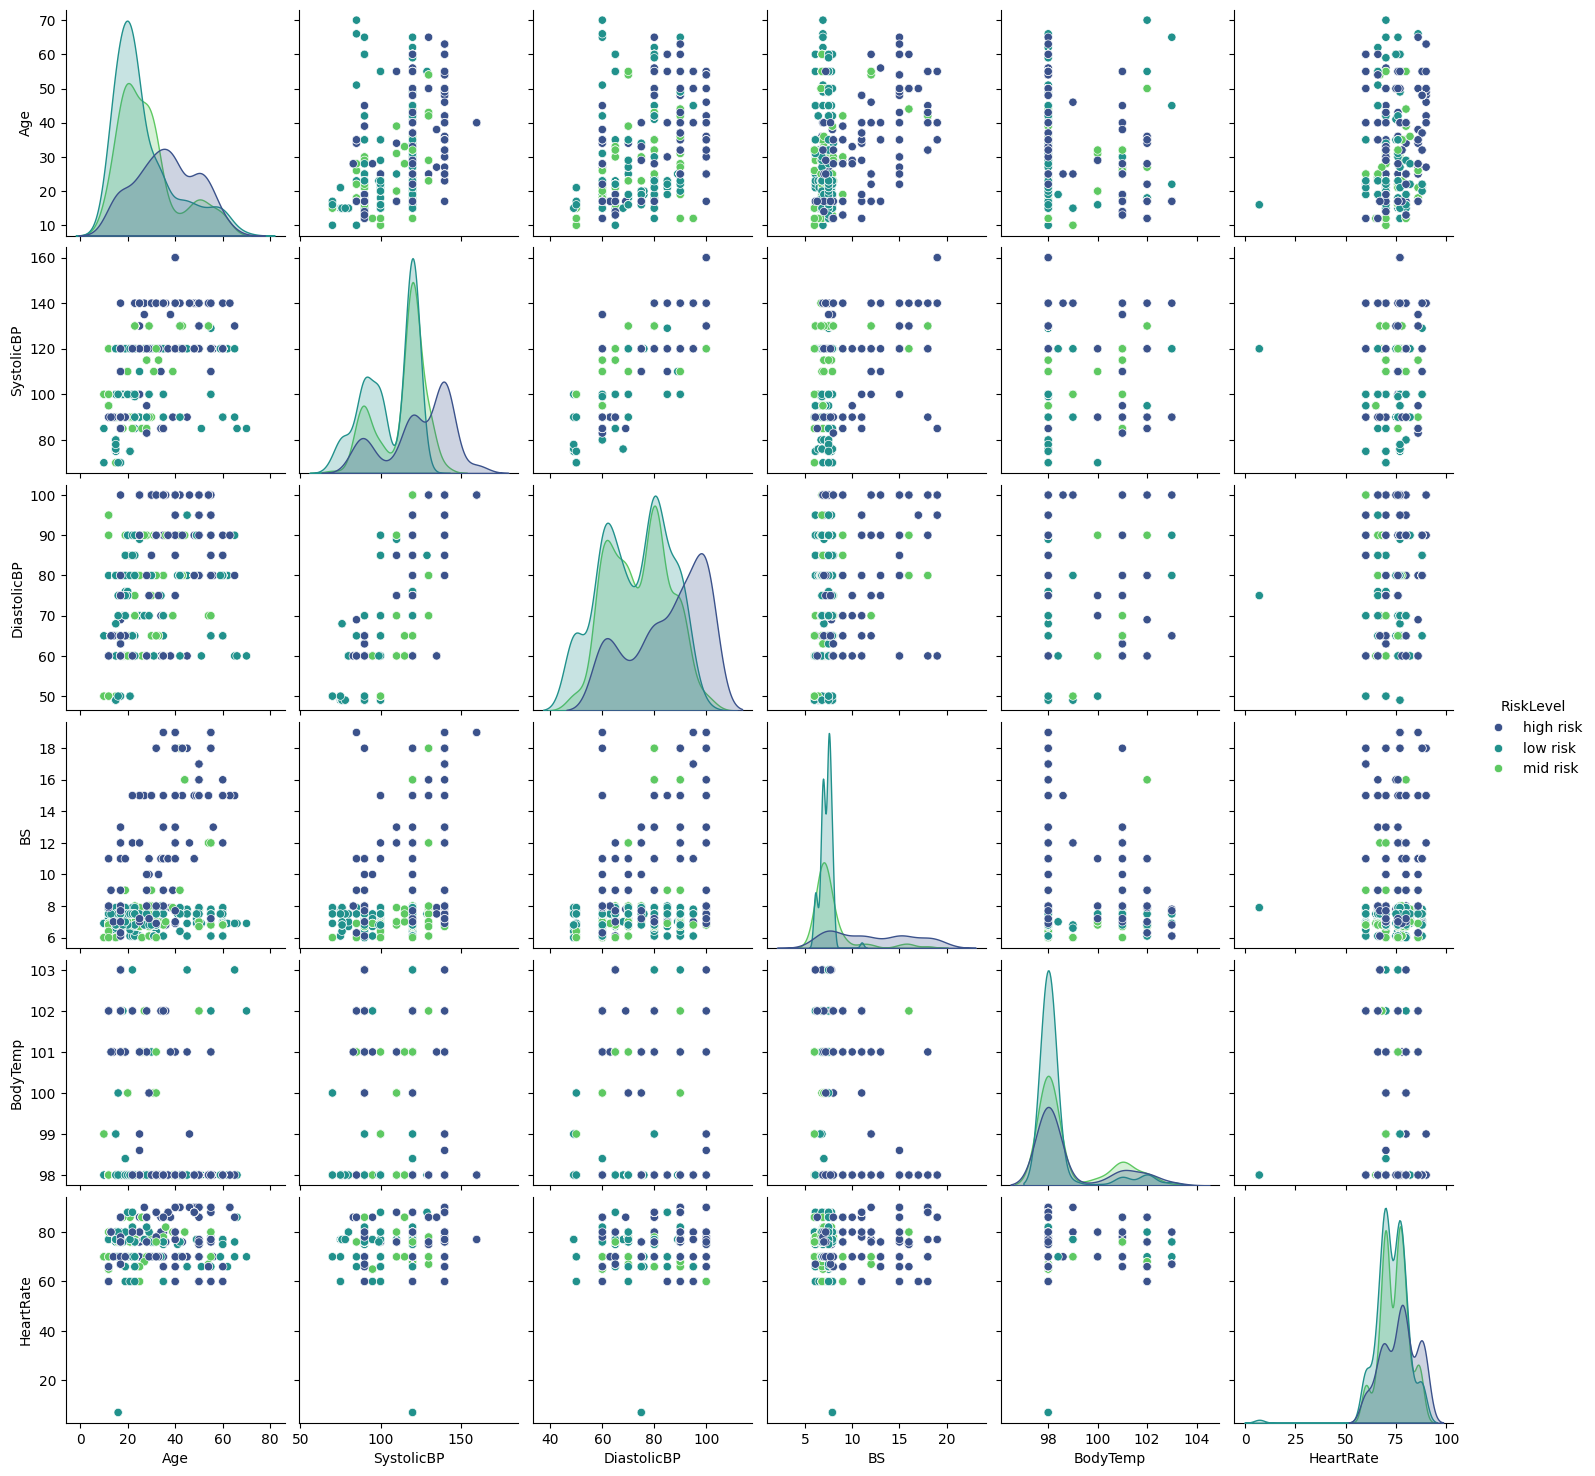

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 8))
sns.pairplot(df, hue="RiskLevel", palette="viridis", diag_kind="kde", height=2.5)
plt.show()





---

4. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.)
   present in the dataset.
   - Plan preprocessing steps for each data type.

    1. **Numerical Data:**
    - Age
    - Systolic BP
    - Diastolyic BP
    - BS(blood sugar)
    - Body Temp
    - HeartRate

    **Preprocessing steps for numerical data**
    1. Handle missing values.
    2. Detect outliers
    3. Scaling/normalisation

    2. **Categorical Data:**
    - RiskLevel
    
    **Preprocessing steps for categorical data**
    1. Encoding. This is converting the categorical variables into numerical representation using techniques such as one-hot encoding.
    2. Handling missing values.

---



In [ ]:
# Emcoding categorical variable in risklevel
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'RiskLevel' column
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])


In [ ]:
# Print the first 10rows to confirm if encoding worked
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,0
1,35,140,90,13.00,98.0,70,0
2,29,90,70,8.00,100.0,80,0
3,30,140,85,7.00,98.0,70,0
4,35,120,60,6.10,98.0,76,1
5,23,140,80,7.01,98.0,70,0
6,23,130,70,7.01,98.0,78,2
7,35,85,60,11.00,102.0,86,0
8,32,120,90,6.90,98.0,70,2
9,42,130,80,18.00,98.0,70,0




5. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   1. Individuals with high blood sugar levels will have a higher heart rate and are at high risk of maternal mortality.
   2. Older individuals are hypothesized to have high systolic and diastolic blood pressure levels as compared to younger individuals.
   3. Individuals with optimal heart rate(between 70-80 beats per minute), low BP levels are hypothesized to be at a low risk of maternal mortality.

   **Methodologies to test the hypotheses**
   1. Correlation analysis: I can use pearson correlation coefficients to access the strength and direction of relationship between two variables. Positive correlation means that it supports the hypotheses.
   2. Perform a simple linear regression with age as the predictor and systolic or diastolic blood pressure as the response. Check for a significant positive coefficient, which would support this hypothesis.
   3. Logistic Regression for Combined Predictors: Using both heart rate and blood pressure as predictors in a logistic regression model to estimate their combined effect on mortality risk, which can help quantify the protective effects of optimal levels.


---


6. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.


   To access the density of the data, I can draw density plots and analyze the distribution patterns. Dense data will have consistent values across the range while sparse data has gaps in it.

   **Strategies for handling missing values**

   To handle missing values:
   1. One can replace the null values with eaither mean, median or mode for numerical data and replace the most frequent category for categorical data.
   2. One can also use K-nearest neighbor algorithm to predict missing values based on other neighbouring features.
   3. Or ultimately access rows with missing values on their values towards their predictive importance and then drop them.



---
**Handling outliers**

To first **identify** outliers in the data, I can use various techniques.
1. Box plots: Points outside the whiskers are outliers
2. Z score: This will flag datapoints that are significantly different from the mean based on the standard deviation.
3. Inter Quartile Range(IQR): Here data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

Then to handle them, I can perform the following:
1. Trimming and removing outliers.
2. Median imputation. That is replacing the outliers with the median value.
3. Quartile based flooring and capping. In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.


---



   **Insert code for Handling Sparse/Dense Data and Outliers below**

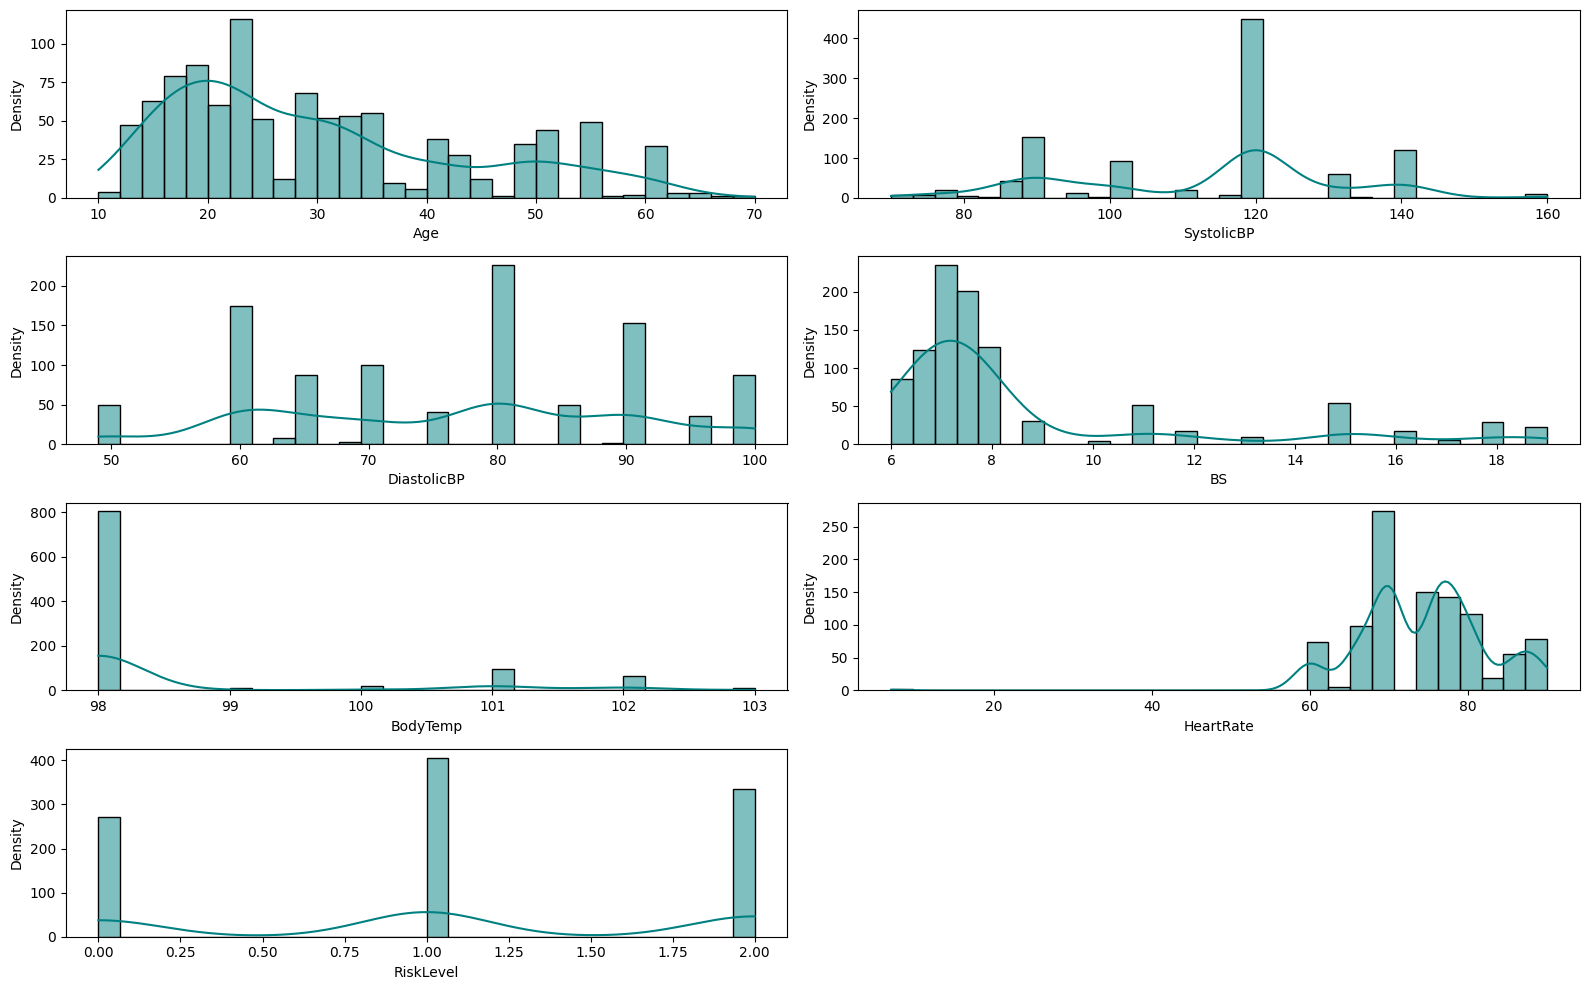

In [ ]:
# Accessing data density
# Visualize the density of each feature
plt.figure(figsize=(16, 10))

# Adjust the subplot grid to accommodate all 7 columns
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

# Loop through each feature and create a density plot
for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 2, i)  # Use calculated rows and 2 columns
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

From the density plot;
Age: The distribution is skewed towards the younger individuals suggesting that the dataset has more younger women as compared to old.

SystolicBP: The distribution shows a distinct peak around 120 mmHg, which is considered a typical healthy systolic blood pressure. There are smaller peaks and scattered values at higher blood pressure readings, suggesting the presence of some hypertensive cases in the dataset.

DiastolicBP: distribution is somewhat uniform with peaks around 70-80 mmHg, which aligns with typical healthy diastolic blood pressure levels.

BloodSugar: The blood sugar levels are highly concentrated around 6-8 mmol/L, with a clear right skew showing some outliers at higher levels.

Bodytemp: very low variation, with almost all data points clustered around 98°F.

HeartRate:  a moderate amount of variation, with a peak around 70-80 bpm, which falls within the normal resting range for adults.





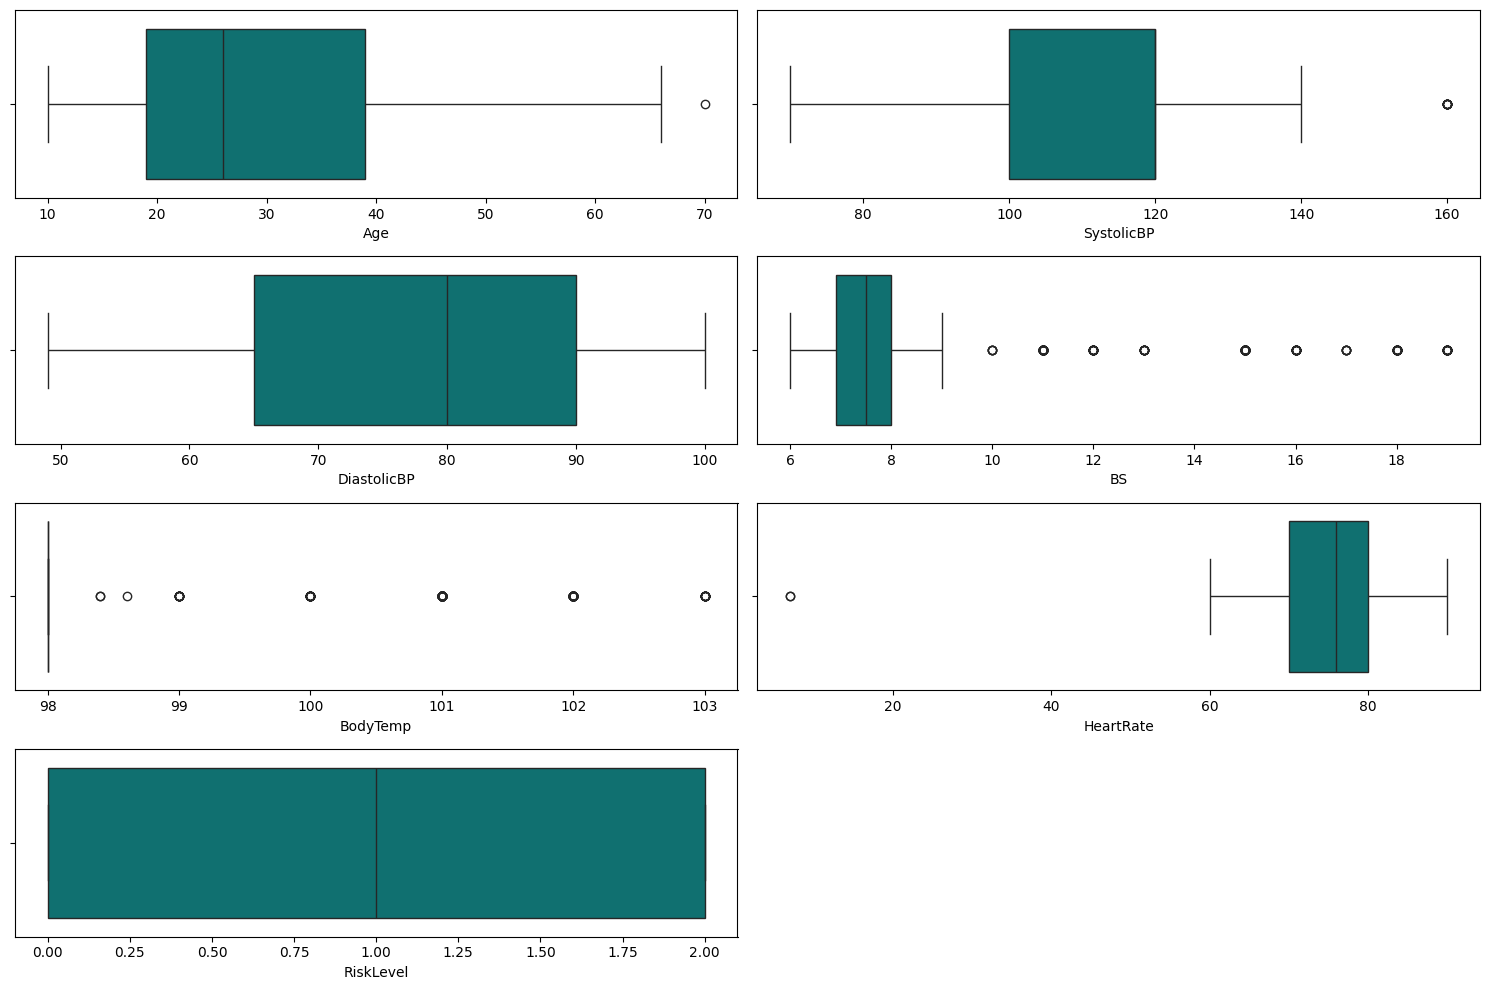

In [ ]:
# Visualizing outliers with boxplots
plt.figure(figsize=(15, 10))

# Adjust the subplot grid to accommodate all columns
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Calculate rows needed, ensuring enough space

# Loop through each feature and create a boxplot
for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 2, i)  # Use calculated rows
    sns.boxplot(x=df[column], color='teal')


plt.tight_layout()
plt.show()

From the boxplots, we have outliers in **Age, Systolic BP, BS, and Heartrate**
We need to handle them.

Body temperature lacks variability.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Handling outliers by capping
df_no_outliers = df.copy()
# Replaces outliers beyond 1.5*IQR with 1.5*IQR boundary)
for column in df.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]

    # Cap values outside the bounds
    df_no_outliers[column] = np.where(df[column] < lower_bound, lower_bound, df_no_outliers[column])
    df_no_outliers[column] = np.where(df[column] > upper_bound, upper_bound, df_no_outliers[column])


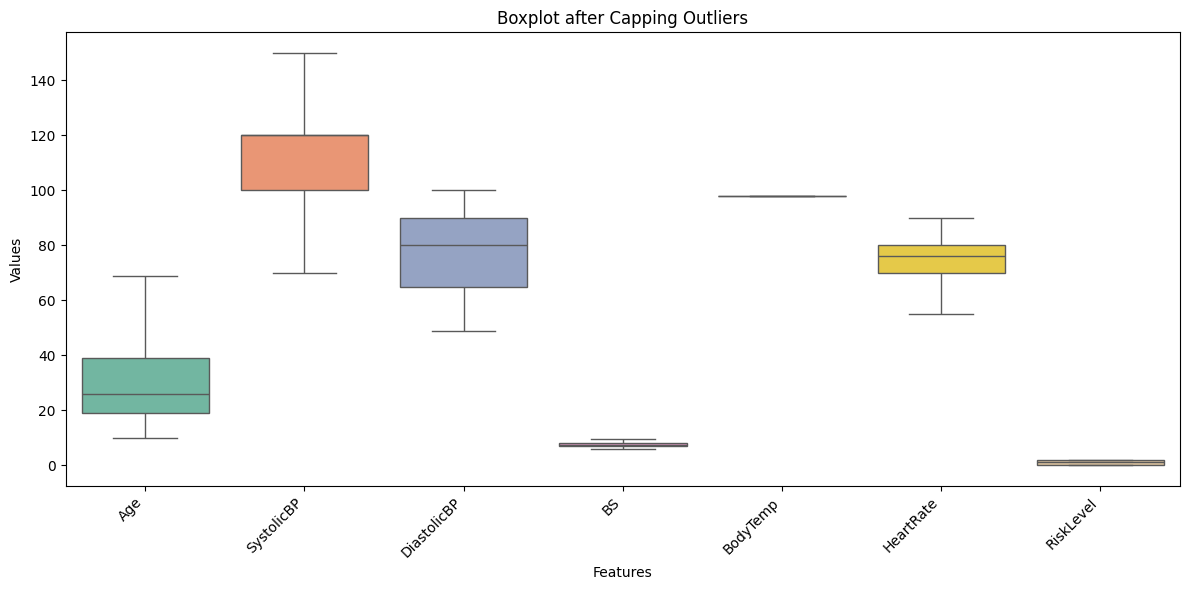

In [ ]:
# Let's draw the boxplot again and see if we still have outliers
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(data=df_no_outliers, orient="v", palette="Set2")
plt.title("Boxplot after Capping Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


***Perfect, all our outliers have been handled.***

7. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

One methodology to use and split dataset into training, validation, and testing sets is using the train_test_split module from sklearn.model_selection which splits arrays into random train and test subsets. We first split our dataset into X features and Y target. Then we set a ratio for splitting. To ensure reproducibility, we set the random_state parameter. We will also set stratify to ensure that the same proportion of examples is preserved across each class of training and testing data



In [ ]:
from sklearn.model_selection import train_test_split

X = df_no_outliers.drop('RiskLevel', axis=1)  # Features (all columns except target)
y = df_no_outliers['RiskLevel']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)



---


8. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Some techniques to identify and mitigate biases are:
    1. **Resampling.** There are various techniques one which is cross validation. A type we can use of criss validation is Stratified K-fold cross-validation: The dataset is divided into "**k" folds**, and the model is trained and **tested "k" times,** each time using a different fold as the test set.  Each fold maintains the same distribution of the target variable as the original dataset, addressing potential imbalances.
    2. **Oversampling and undersampling. **Check if certain classes are underrepresented then using techniques such as SMOTE to balance the training data.
    3. **Re-weighting.** This involves adjusting weights of data points during training to balance the representation of different groups.
    4. **Regular monitoring.** Continuosly monitoring the model's performance overtime to detect any bias drift**


---



In [ ]:
# Display the distribution of values across each class
class_distribution = df_no_outliers['RiskLevel'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
RiskLevel
1.0    406
2.0    336
0.0    272
Name: count, dtype: int64


Class 0(high risk) has 272 samples. Class 1(low risk) has 406 samples.
Class 2(mid risk) has 336 samples.

Our classes are imbalanced. We can perform oversampling on the high risk class



In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={0: 406}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

9. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

To transform raw data into model-friendly format you can perform scaling, handling missing data/outliers, encoding categorical variables. Some of these like handling missing data/outliers has been discussed above under point 5, you can refer there.

Some scaling techniques to do this are:
1. **Min-Max scaling:** This technique rescales the X features to a fixed range, [0, 1]. The formula:

***Xscaled = (X - Xmin )/ (Xmax - Xmin)***

Ultimately you can use the code bit:

2. **Z score normalization** Standardizes the features by removing the mean and scaling it to unit variance.
Formula: ***Xstandard = (X - μ) / σ ***

where μ is the mean and σ the StandardDeviation.

**Encoding categorical variables**

1. **One-hot encoding:** This creayes a new binary column for each categpry in the categorical feature. Can be used where no inherent order exists.


```
# df = pd.get_dummies(df, columns=['CategoryFeature'])
```
2. **Label Encoding;** This asssigns each category an integer label and is used when categories have an ordinal relationship.
Refer above for the coding bit as it has been implemented.



---





In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled_scaled  = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


10. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **



<ipython-input-24-ccc27d6f9d07>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_d")


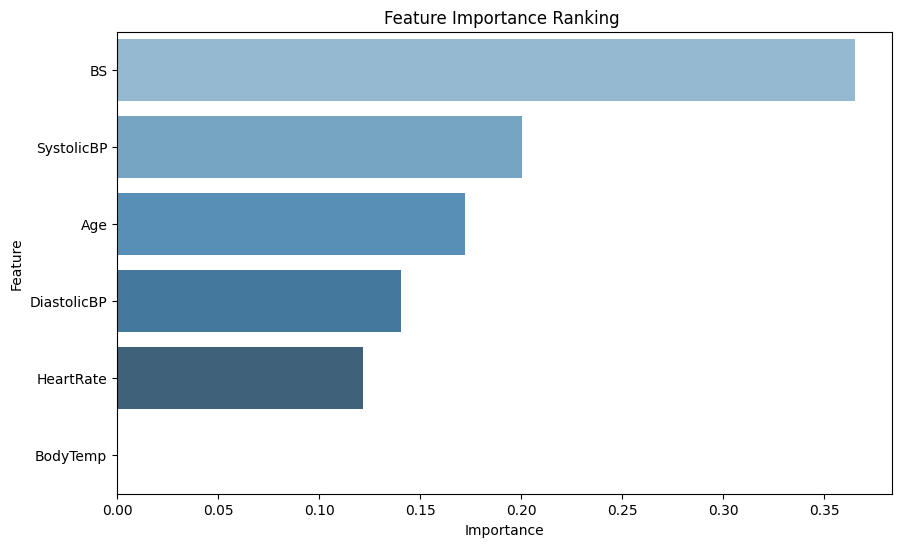

       Feature  Importance
3           BS    0.365221
1   SystolicBP    0.200345
0          Age    0.172240
2  DiastolicBP    0.140688
5    HeartRate    0.121506
4     BodyTemp    0.000000


In [ ]:
# Using randomforest to determine features that are important

from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled_scaled, y_train_resampled)

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_d")
plt.title("Feature Importance Ranking ")
plt.show()

print(feature_importance_df)



---


From the above diagram:

*Blood Sugar* is the **most** important feature for predicting RiskLevel, contributing *36%* to the model's predictions.

Other significant features include:
- *Systolic BP*, contributing *20%* to the prediction of RiskLevel.
- *Age*, contributing *17%*.
- *Diastolic BP*, contributing *14%*.
- *Heart Rate*, contributing *12%*.

**Body Temperature** has *no* predictive importance and *does not* contribute to the model’s RiskLevel predictions. As such, it can be dropped from the dataset.

**Explanation:**

The ranking of these features shows their significance in relation to the project objectives of predicting RiskLevel.

The features are **ranked in order of importance,** with *Blood Sugar* being the **most influential** for accurate predictions.

Features that contribute the most **(Blood Sugar, Systolic BP, Age, Diastolic BP, and Heart Rate)** are *highly relevant* for model training and should be *retained*, while Body Temperature can be excluded due to its lack of impact.


---



11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

Processed data will be stored in:
1. **Cloud-Based Storage:** Given the sensitivity of maternal health data, it is crucial to use secure cloud storage options. Providers like Google Cloud Storage offer both scalability and security. Data is encrypted both at rest and in transit, while Google IAM provides fine-grained access control to ensure only authorized users can access the data. This also ensures accessibility, allowing users with the proper credentials to access the data from any device.

2. **Relational Database:** As the project expands, structured data, such as medical history, will be stored in a relational database. Solutions like MySQL or MongoDB are ideal for efficiently storing and querying structured data, enabling easy analysis and integration with other systems.
---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.

In [ ]:
least_important_feature = feature_importance_df.iloc[-1]['Feature']  # The least important feature

# Drop the least important feature from the scaled data
X_train_resampled_scaled_dropped = pd.DataFrame(X_train_resampled_scaled, columns=X_train.columns).drop(columns=[least_important_feature])